In [2]:
# importing all the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [3]:
# Loading the dataSet
df = pd.read_csv('./_annotations.csv')
df.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,a_846_jpg.rf.16ae5101af82219ebb320a9848f8ad80.jpg,720,404,6,138,11,295,211
1,a_144_jpg.rf.1e2dff958e04ae1f6ce93627c8ef281a.jpg,720,404,11,135,285,278,375
2,a_124_jpg.rf.157aebd9cf9c92cc819b6ec92a7183fd.jpg,720,404,10,222,316,437,402
3,no_9_jpg.rf.207063dcdefd0a9c4c30d682c6bb5d9b.jpg,2304,1440,10,864,980,1424,1206
4,surgery_5_jpg.rf.14697c20b72556a364ce21b3ab930...,2304,1440,13,1129,750,1516,994
5,a_933_jpg.rf.14b069909e8faef35f91cf0173c84bf0.jpg,720,404,11,172,212,268,276
6,a_311_jpg.rf.2544fe462a2807b99b05fedaf5c49e72.jpg,720,404,6,160,34,334,252
7,a_123_jpg.rf.2389dca6f0653e955bb7d04f5a585037.jpg,720,404,10,231,269,426,386
8,a_173_jpg.rf.23ff24582f38cad8e1126017b5688029.jpg,720,404,13,290,254,453,404
9,a_899_jpg.rf.23dff9b5995099519d4478f0c89342ee.jpg,720,404,9,285,169,390,297


In [4]:
# A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If 
# your data deals with multiple classes, you can take any two classes. Steps below (refer below 
# diagram for understanding):

# 1. Calculate the mean for each class (also called as class centroid)
# (Suggestion: You may use numpy.mean() function for finding the average vector for all 
# vectors in a given class. Please def


width_mean = df['width'].mean()
height_mean = df['height'].mean()
class_mean = df['class'].mean()
xmin_mean = df['xmin'].mean()
ymin_mean = df['ymin'].mean()
xmax_mean = df['xmax'].mean()
ymax_mean = df['ymax'].mean()

print(f"Mean of width: {width_mean}, height :{height_mean}, class :{class_mean}, xmin :{xmin_mean}, ymin :{ymin_mean}, xmax :{xmax_mean}, ymax :{ymax_mean}")

Mean of width: 1191.6404494382023, height :712.4719101123595, class :7.544943820224719, xmin :444.2022471910112, ymin :311.89325842696627, xmax :646.6910112359551, ymax :516.4662921348314


In [5]:
# 2• Calculate spread (standard deviation) for each class
# (Suggestion: You may use numpy.std() function for finding the standard deviation vector 
# for all vectors in a given class. Please define the axis property appropriately to use this 
# function.)



width_std = np.std(df['width'])
height_std = np.std(df['height'])
class_std = np.std(df['class'])
xmin_std =np.std(df['xmin'])
ymin_std =np.std(df['ymin'])
xmax_std =np.std(df['xmax'])
ymax_std =np.std(df['ymax'])

print(f"Standard Deviation of width: {width_std}, height :{height_std}, class :{class_std}, xmin :{xmin_std}, ymin :{ymin_std}, xmax :{xmax_std}, ymax :{ymax_std}")

Standard Deviation of width: 724.3160624781443, height :473.73197015616, class :4.0972314915952985, xmin :329.2429921199822, ymin :247.5994065710305, xmax :413.87057634500417, ymax :329.8411117131086


In [6]:
#3.Calculate the distance between mean vectors between classes
# (Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
# distance between two centroids.)


# Calculate mean vectors (centroids) for each class
class_means = df.groupby('class')[['xmin', 'ymin', 'xmax', 'ymax']].mean()

print(class_mean)

# Specify the classes for which you want to calculate the distance
class1 = 10
class2 = 11

# Calculate the Euclidean distance between centroids
centroid1 = class_means.loc[class1].values
centroid2 = class_means.loc[class2].values
distance = np.linalg.norm(centroid1 - centroid2)

print(f"Distance between class {class1} and class {class2} centroids: {distance}")


7.544943820224719
Distance between class 10 and class 11 centroids: 209.33287803527332


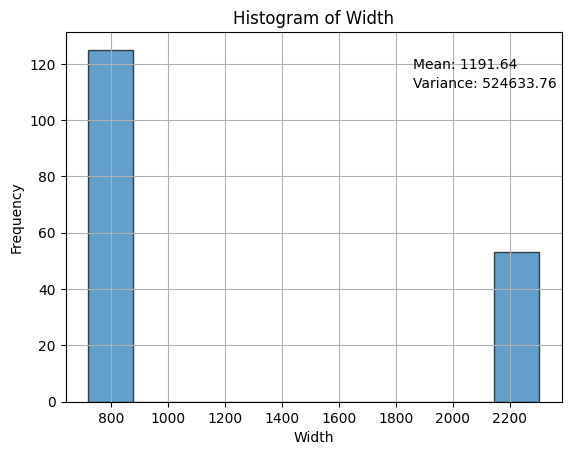

In [7]:
# A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
# histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
# variance from the available data. 
# (Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be 
# achieved with matplotlib.pyplot.hist())


width_values = df['width']
width_values


# Generating a histogram with 179 bins 
hist, bins = np.histogram(width_values, bins=10)

# calculating the mean and variance of the width value
mean_width = np.mean(width_values)
variance_width = np.var(width_values)

# Display mean and variance
plt.text(0.7, 0.9, f'Mean: {mean_width:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'Variance: {variance_width:.2f}', transform=plt.gca().transAxes)

# Now ploting the histogram
plt.hist(width_values, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Width')
plt.grid(True)

plt.show()



C:\Users\PRADEEP\AppData\Local\Temp\ipykernel_5400\700680447.py:11: RuntimeWarning: invalid value encountered in scalar power
  distance = np.power(np.abs(vector1 - vector2), r).sum() ** (1 / r)
C:\Users\PRADEEP\AppData\Local\Temp\ipykernel_5400\700680447.py:11: RuntimeWarning: invalid value encountered in scalar power
  distance = np.power(np.abs(vector1 - vector2), r).sum() ** (1 / r)
C:\Users\PRADEEP\AppData\Local\Temp\ipykernel_5400\700680447.py:11: RuntimeWarning: invalid value encountered in scalar power
  distance = np.power(np.abs(vector1 - vector2), r).sum() ** (1 / r)


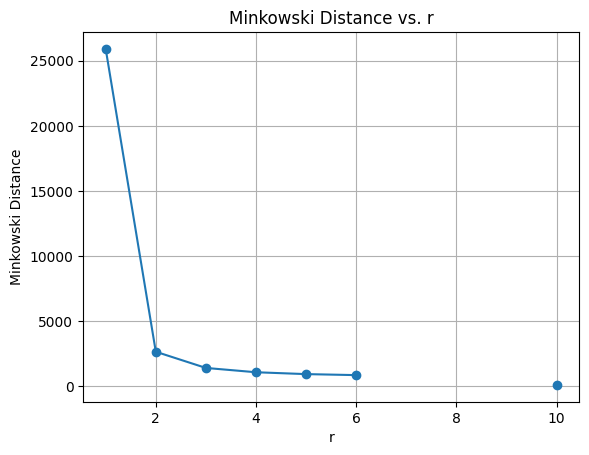

In [8]:
# A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
# to 10. Make a plot of the distance and observe the nature of this graph.

vector1 = df['xmax']
vector2 = df['ymax']

# Defining the function to calculate the Minkowski distance
distances = []
r_values = np.arange(1, 11)
for r in r_values:
    distance = np.power(np.abs(vector1 - vector2), r).sum() ** (1 / r)
    distances.append(distance)


# plot the distance
plt.plot(r_values, distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [9]:
# A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the traintest_split() function available in SciKit. See below sample code for help:
# >>> import numpy as np
# >>> from sklearn.model_selection import train_test_split
# >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


from sklearn.model_selection import train_test_split
list = ['width','height','xmin','ymin','xmax','ymax']
X = df[list]
y = df["class"]  

X_train , X_test ,y_train  , y_test   = train_test_split(X,y,test_size=0.3)


print(f"X_train :{X_train}")
print(f"X_test :{X_test}")
print(f"y_train :{y_train}")
print(f"y_test :{y_test}")


X_train :     width  height  xmin  ymin  xmax  ymax
125    720     404   300   196   478   307
160   2304    1440   792   850   992  1104
167    720     404   273   154   395   299
162    720     404   276   211   452   335
131    720     404   268   196   399   289
..     ...     ...   ...   ...   ...   ...
39    2304    1440   851   962  1512  1220
93     720     404   297   163   400   325
56    2304    1440  1109   762  1510  1024
158    720     404   277   222   431   330
66    2304    1440   935   586  1239  1006

[124 rows x 6 columns]
X_test :     width  height  xmin  ymin  xmax  ymax
98    2304    1440   835   974  1440  1214
20    2304    1440  1014   806  1293  1112
130   2304    1440   986   368  1134   830
2      720     404   222   316   437   402
116   2304    1440   805   876   989  1076
147   2304    1440   850   530  1174  1078
9      720     404   285   169   390   297
41     720     404   141    24   304   214
100   2304    1440   956   506  1156  1036
43     720   

In [10]:
# A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code 
# for help:
# >>> import numpy as np
# >>> from sklearn.neighbors import KNeighborsClassifier
# >>> neigh = KNeighborsClassifier(n_neighbors=3)
# >>> neigh.fit(X, y)


from  sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) # n_neighbors default is 5

neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for 
# help.
neigh_score_k3 = neigh.score(X_test, y_test)
print(neigh_score_k3)

0.9259259259259259


In [19]:
# A7. Use the predict() function to study the prediction behavior of the classifier for test vectors. 

print(neigh.predict(X_test))


[10  9  5 10 11 12  9  6 12  1  6 13  2 11  5  4  1  9  8  3  4  8 10 13
 13  8  5  8 13  5  8  3  5 13  3  5  1 13  3  7  6 13  4  8 13  1  3 12
 10  6 13  9 13  3]


[10  9  5 10 11 12  9  6 12  1  6 13  2 11  5  4  1  9  8  3  4  8 10 13
 13  8  6  8 13  5  8  3  5 13  3  5  1 13  3  7  6  9  4 13  8  1  3 12
 10  6 13  9 13  3]
Both predictions are correct with accuracy score: k=1: 1.0 and k=3: 0.9259259259259259


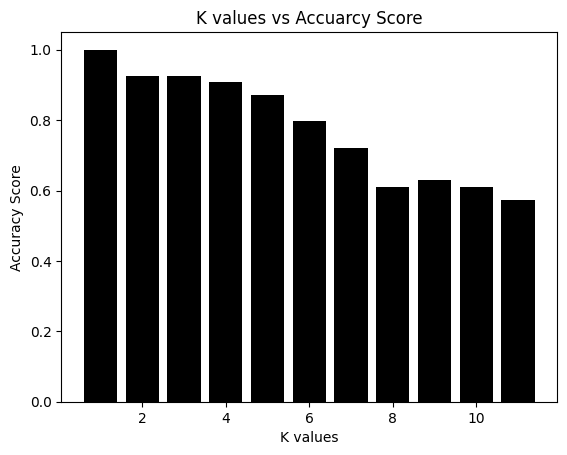

In [20]:
# A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 
# 11 and make an accuracy plot.
neigh = KNeighborsClassifier(n_neighbors=1) 
neigh.fit(X, y)
neigh_score_k1=neigh.score(X_test, y_test)
print(neigh.predict(X_test))
print(f'Accuracy prediction of : k=1: {neigh_score_k1} and for k=3: {neigh_score_k3}')

x_axis= np.arange(1,12)
y_axis=[]

for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i) 
    neigh.fit(X, y)
    y_axis.append(neigh.score(X_test, y_test))

plt.bar(x_axis,y_axis,color='black')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('K values vs Accuarcy Score')
plt.show()


In [22]:
# A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
# other performance metrics such as precision, recall and F1-Score measures for both training and test 
# data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).


                       # >>>>>>>>>>>>>>>>>>>>>>>>>>>Important Comment<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Since we are dealing with images so we can't evaluate the confusion matrix problem because for this we required labels and other elements in the csv formate which is not available in our dataset.


